In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Stores.csv")

In [3]:
df.head()
#looks like store id can be used as index

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [5]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [6]:
columns=df.columns.tolist()
columns

['Store ID ',
 'Store_Area',
 'Items_Available',
 'Daily_Customer_Count',
 'Store_Sales']

In [7]:
#stri the white space from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

In [8]:
df.set_index('Store ID', inplace=True)

Check out some relationships if any

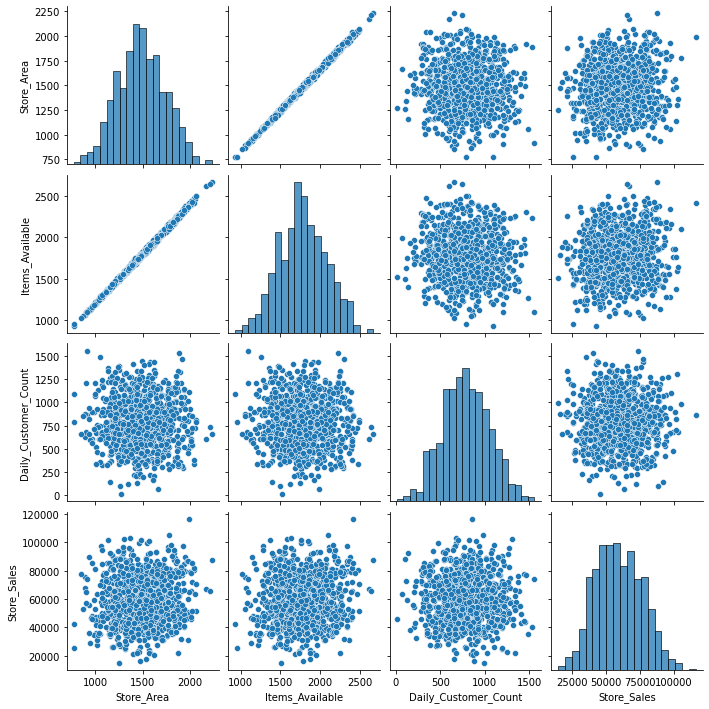

In [9]:
sns.pairplot(df);

Besides the strong correlation between Store_Area and Items_Available, there is no obvious relationships between other features.
Use Regplot to see if seaborn can see any relationships

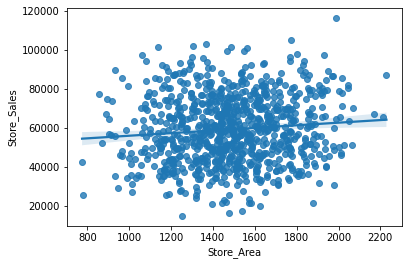

In [10]:
sns.regplot(x='Store_Area', y='Store_Sales', data=df);

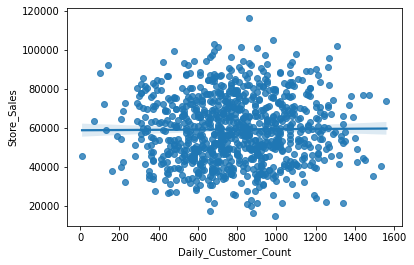

In [11]:
sns.regplot(x='Daily_Customer_Count', y='Store_Sales', data=df);

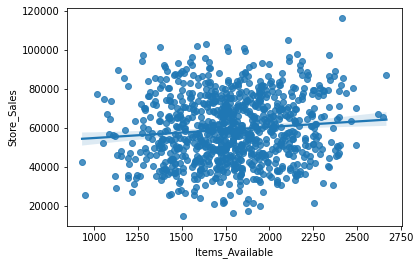

In [12]:
sns.regplot(x='Items_Available', y='Store_Sales', data=df);

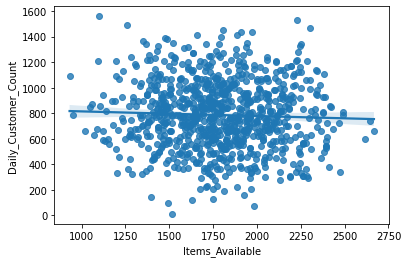

In [13]:
sns.regplot(x='Items_Available', y='Daily_Customer_Count', data=df);

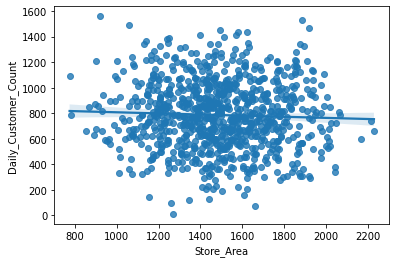

In [14]:
sns.regplot(x='Store_Area', y='Daily_Customer_Count', data=df);

# First Observations: 
 - very strong relationship between store size and items available.  Naturally, the bigger the store the more items it can stock
 - small positive relationship between size of stores and store sales, because the bigger the stores the more products available for purchase
 - small positive relationship between number of items available and store sales for same reason above
 - Surprisingly, almost no obvious relationship between number of daily customer count and store sales, one would think the more customers in a store the more sales
 - Also surprising, small negative relationship between number of items available and daily customer count, so despite the more items available to sell (due to size of store), it does not mean more customers are entering the store.


What's the distribution of the features?

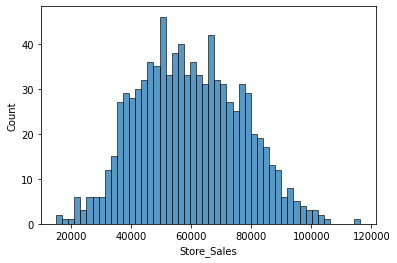

In [15]:
sns.histplot(df['Store_Sales'], bins=50);

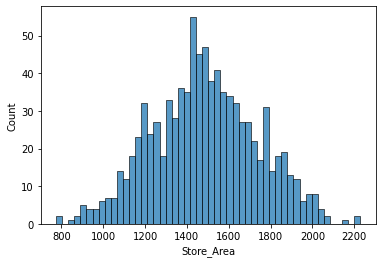

In [16]:
sns.histplot(df['Store_Area'], bins=50);

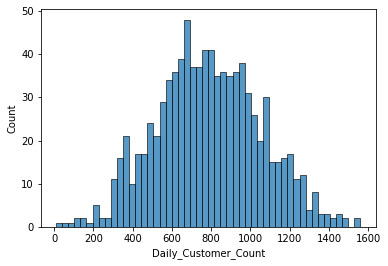

In [17]:
sns.histplot(df['Daily_Customer_Count'], bins=50);

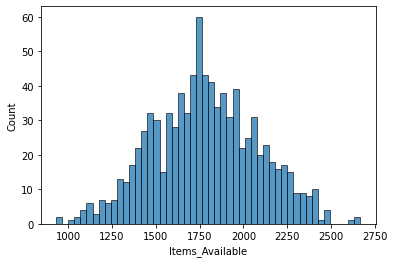

In [18]:
sns.histplot(df['Items_Available'], bins=50);

In [19]:
#create a copy of df to add columns
df_copy=df.copy()

In [20]:
df_copy['Sales_per_cust']=df_copy['Store_Sales']/df_copy['Daily_Customer_Count']

In [21]:
df_copy['Sales_per_storearea']=df_copy['Store_Sales']/df_copy['Store_Area']
df_copy['Cust_per_storearea']=df_copy['Daily_Customer_Count']/df_copy['Store_Area']

(0.0, 500.0)

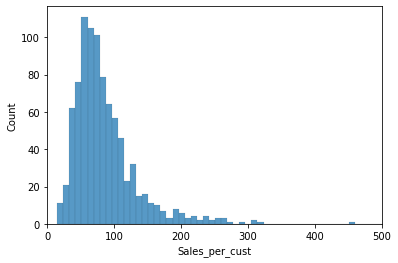

In [22]:
sns.histplot(df_copy['Sales_per_cust'], bins=500);
plt.xlim((0,500))

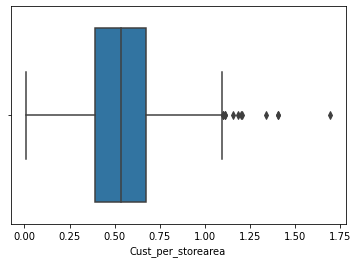

In [23]:
sns.boxplot(x=df_copy['Cust_per_storearea']);

In [24]:
df_copy.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_per_cust,Sales_per_storearea,Cust_per_storearea
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804,94.043175,40.985713,0.547112
std,250.237011,299.872053,265.389281,17190.741895,162.819099,13.700402,0.216652
min,775.000000,932.000000,10.000000,14920.000000,15.070707,11.083277,0.007874
25%,1316.750000,1575.500000,600.000000,46530.000000,55.875573,31.067499,0.393894
50%,1477.000000,1773.500000,780.000000,58605.000000,75.409239,39.780622,0.535963
75%,1653.500000,1982.750000,970.000000,71872.500000,102.853319,48.734073,0.676032
max,2229.000000,2667.000000,1560.000000,116320.000000,4548.000000,96.309013,1.697497


## How many stores with store area in the top 25% but with sales in the lower 25%

In [25]:
perc_75_size = df_copy.describe().iloc[6,0]
perc_25_sales = df_copy.describe().iloc[4,3]
df_poor=df_copy[(df_copy['Store_Area']>perc_75_size) & (df_copy['Store_Sales']< perc_25_sales)]
df_poor.sample(10)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_per_cust,Sales_per_storearea,Cust_per_storearea
Store ID,,,,,,,
475,1836,2195,940,45160,48.042553,24.596950,0.511983
825,1778,2133,280,45950,164.107143,25.843645,0.157480
361,1759,2095,980,34190,34.887755,19.437180,0.557135
36,1871,2230,700,45460,64.942857,24.297167,0.374131
134,1713,2071,900,40490,44.988889,23.636894,0.525394
428,1709,2042,430,33240,77.302326,19.449971,0.251609
350,1886,2228,1530,40350,26.372549,21.394486,0.811241
653,1809,2145,940,36530,38.861702,20.193477,0.519624
674,1658,2000,350,36210,103.457143,21.839566,0.211098


In [26]:
num_poor_stores = len(df_poor)
print(f"There are {num_poor_stores} stores with store area in the top 25% but with sales in the lower 25%")

There are 44 stores with store area in the top 25% but with sales in the lower 25%


In [27]:
percentage_poor = round((num_poor_stores/len(df_copy) * 100),2)
print(f"percentage of stores under performing = {percentage_poor}%")

percentage of stores under performing = 4.91%


In [28]:
#identify the stores that are in the top 25% of sotre size, have lower than 25% sales yet are in the top 25% of customer traffic
cust_count_75=df_copy.describe().iloc[6,2]
df_big_poor_sales = df_copy[(df_copy['Store_Area']>perc_75_size) & (df_copy['Store_Sales']< perc_25_sales) & (df_copy['Daily_Customer_Count']> cust_count_75)]
df_big_poor_sales.sort_values(['Sales_per_cust','Sales_per_storearea'], ascending=False)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_per_cust,Sales_per_storearea,Cust_per_storearea
Store ID,,,,,,,
20,1940,2340,980,40190,41.010204,20.716495,0.505155
636,1933,2338,1140,44730,39.236842,23.140197,0.589757
188,1660,1985,1180,42860,36.322034,25.819277,0.710843
454,1808,2154,990,35220,35.575758,19.480088,0.547566
865,1846,2195,1170,41090,35.119658,22.258938,0.633803
209,1703,2055,1080,37830,35.027778,22.213740,0.634175
361,1759,2095,980,34190,34.887755,19.437180,0.557135
397,1689,2044,1140,32260,28.298246,19.100059,0.674956
350,1886,2228,1530,40350,26.372549,21.394486,0.811241


In [29]:
print(f"There are {len(df_big_poor_sales)} stores in the top 25% of store size with lower than 25% of sales \nand have top 25% of customer traffic")

There are 10 stores in the top 25% of store size with lower than 25% of sales 
and have top 25% of customer traffic


# Second Observation:
There are 44 stores with store area in the top 25% but with sales in the lower 25%.
- these stores might be new or fairly new, may not have had enough time to gain sales momentum
- these stores may not be in the optimal locations


There are 10 stores in the top 25% of store size with lower than 25% of sales 
and have top 25% of customer traffic
- Despite the size of store and high volume of items available as well as high daily customer count, these 10 stores are making less than 25% of sales.  There could be a number of reasons; these stores might not be offering the right product mix for the store's demographics, products with lower than expected value proposition.
- Need more data on products and locations to investigate further

# scale the features in preparation for ML

In [30]:
features_list=df.columns[:3].tolist()
features_list

['Store_Area', 'Items_Available', 'Daily_Customer_Count']

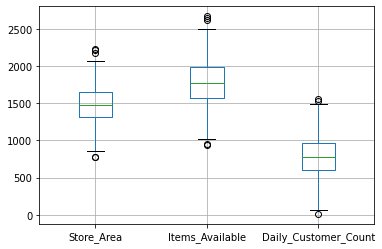

In [31]:
#before scaling the features, check the spread/outliers
df[features_list].boxplot();

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math

#split the data
X=df[features_list]
y=df['Store_Sales']

Xtrain,Xtest,ytrain, ytest = train_test_split(X,y,test_size=0.3)




In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xtrain[features_list]=scaler.fit_transform(Xtrain[features_list])

Xtrain.head()

,Store_Area,Items_Available,Daily_Customer_Count
Store ID,,,
491,-1.316031,-1.355796,-0.627425
775,-0.236328,-0.274743,1.077225
773,-1.036869,-0.962375,-0.475900
39,1.442753,1.435784,0.849939
93,1.438648,1.439205,-1.460809


In [34]:
model=LinearRegression()
model.fit(Xtrain,ytrain)

cv_score = cross_validate(model, Xtrain, ytrain,cv=10, \
    scoring=['max_error','r2','neg_mean_absolute_error','neg_mean_squared_error'])

In [35]:
for key, value in cv_score.items():
    print(f"{key} {round(np.mean(value),3)}")

fit_time 0.001
score_time 0.001
test_max_error -40260.899
test_r2 -0.011
test_neg_mean_absolute_error -14059.058
test_neg_mean_squared_error -292281188.797


In [36]:
#try solvers
from sklearn.linear_model import SGDRegressor

sql_sgd= SGDRegressor(loss="squared_error")
sql_sgd.fit(Xtrain, ytrain)

cv_score_sgd = cross_validate(sql_sgd, Xtrain,ytrain,cv=10, \
    scoring=['max_error','r2','neg_mean_absolute_error','neg_mean_squared_error'])


In [37]:
for key, value in cv_score_sgd.items():
    print(f"{key} {round(np.mean(value),3)}")

fit_time 0.002
score_time 0.001
test_max_error -40434.343
test_r2 -0.012
test_neg_mean_absolute_error -14089.811
test_neg_mean_squared_error -292636369.443


In [38]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
#find best n-neighbors for the KNN model
best_k=[]
for knn in range(2,20):
    neigh = KNeighborsRegressor(n_neighbors=knn)
    neigh.fit(Xtrain, ytrain)
    score=cross_val_score(neigh,Xtrain, ytrain, cv=5)
    best_k.append(score.mean())


Text(0, 0.5, 'cross_val_score')

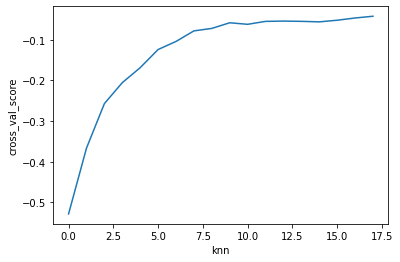

In [39]:
plt.plot(best_k);
plt.xlabel('knn')
plt.ylabel('cross_val_score')


In [40]:
best_score=max(best_k)
best_k=best_k.index(best_score)
best_k

17

In [41]:
neigh = KNeighborsRegressor(n_neighbors=best_k)
neigh.fit(Xtrain, ytrain)

cv_knn = cross_validate(neigh, Xtrain,ytrain,cv=10, \
    scoring=['max_error','r2','neg_mean_absolute_error','neg_mean_squared_error'])

In [42]:
for key, value in cv_knn.items():
    print(f"{key} {round(np.mean(value),3)}")

fit_time 0.001
score_time 0.001
test_max_error -41376.294
test_r2 -0.066
test_neg_mean_absolute_error -14280.575
test_neg_mean_squared_error -306676592.343


In [43]:
Xtest[features_list] =scaler.fit_transform(Xtest[features_list])

In [44]:
#Best model going by MAE is LinearRegression

y_pred=model.predict(Xtest)

mse=round(mean_squared_error(ytest,y_pred),3)
rmse=round(math.sqrt(mse),3)
mae=round(mean_absolute_error(ytest,y_pred),3)
Rsquared = round(r2_score(ytest,y_pred),3)
Max_err = round(max_error(ytest,y_pred),3)

print(f"mse {mse}, rmse {rmse}, mae {mae}, Rsquared {Rsquared}, Max err {Max_err}")

mse 304544985.808, rmse 17451.217, mae 14281.201, Rsquared -0.027, Max err 45098.049


Difference between train and test data using LinearRegression
- mae on train data = 14,059
- mae on test data = 14,281